#Observable Trends 
#Urban cities have the lowest average fares, but the highester number of rides per city. The factors to consider are a. the supply and demand curve of drivers/riders in urban centers, b. the distance one travels, and c. the volume of rides a driver can undertake, given demand. 

#While average fares are lower in urban areas, they comprise the majority of Pyber's total fares. This means that in markets with high demand, the average fare will be lower, however the VOLUME of rides per city contributes to the majority of revenue. 

#Looking at the bubble chart, it would seem that there are several suburban cities with high average fares, and high number of rides. If we consider the same factors as above (Supply & Demand, Distance, & Volume of Rides), all else equal, it would seem that there are more riders than drivers, and the price is increased. Riders want to go further distances, and request rides more frequently than there are drivers to supply it. It would make sense for Pyber to increased its drivers in suburban areas to capture that market. 

In [ ]:
#Import all dependencies 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
#import the city data file 
location_data = pd.read_csv("city_data.csv")
#import the ride data file 
ride_data = pd.read_csv("ride_data.csv")

In [27]:
#drop duplicate cities in the data 
location_data = location_data.drop_duplicates('city')

#check our city data 
location_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [28]:
#check our ride data
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [30]:
#merge data sets by 'City' so we can filter our data by city type 
merged_data = location_data.merge(ride_data, on = 'city', how = 'outer')
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [31]:
# Create separate data frames based on city types - Urban, Suburban and Rural
urban = merged_data.loc[(merged_data["type"] == "Urban")]
suburban = merged_data.loc[(merged_data["type"] == "Suburban")]
rural = merged_data.loc[(merged_data["type"] == "Rural")]

urban.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [14]:
#suburban.head()

In [15]:
#rural.head()

In [16]:
#Urban Cities Calculations
average_fare_urban = urban.groupby(['city'])['fare'].mean()
total_rides_urban = urban.groupby(['city']).count()['ride_id']
total_drivers_urban = urban.groupby(['city'])['driver_count'].value_counts()

#average_fare_urban
#print(len(average_fare_urban))
#total_rides_urban.head()
#total_drivers_urban.head()

In [17]:
#Suburban Calculations
average_fare_suburban = suburban.groupby(['city'])['fare'].mean()
total_rides_suburban = suburban.groupby(['city']).count()['ride_id']
total_drivers_suburban = suburban.groupby(['city'])['driver_count'].value_counts()

In [18]:
#Rural Calculations 
average_fare_rural = rural.groupby(['city'])['fare'].mean()
total_rides_rural = rural.groupby(['city']).count()['ride_id']
total_drivers_rural = rural.groupby(['city'])['driver_count'].value_counts()

#total_drivers_rural

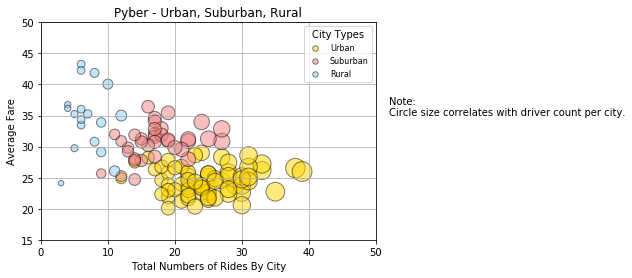

In [68]:
#Make Scatter Plots

plt.scatter(total_rides_urban, average_fare_urban,s=total_drivers_urban*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban, average_fare_suburban,s=total_drivers_suburban*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural, average_fare_rural,s=total_drivers_rural*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Rural")  

# Chart title
plt.title("Pyber - Urban, Suburban, Rural")
# x label
plt.xlabel("Total Numbers of Rides By City")
# y label
plt.ylabel("Average Fare")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(52,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)


#grid 
plt.xlim(0, 50)
plt.ylim(15, 50)
plt.grid(True)

# Save figure 
plt.savefig("PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()

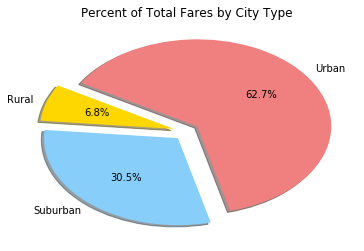

In [70]:
# % of Total Fares by City Type 

City_Type_Grouped = merged_data.groupby(['type'])
Total_Fares = City_Type_Grouped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(Total_Fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Fares by City Type")

# Save Figure
plt.savefig("%TotalFares.png")

# Show Figure
plt.show()

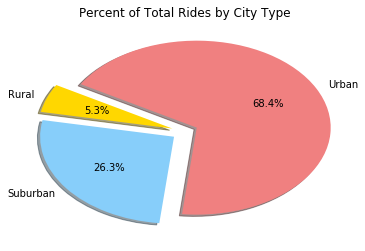

In [69]:
# % of Total Rides by City Type

Rides_City_Type = City_Type_Grouped['ride_id'].count()


# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(Rides_City_Type, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Rides by City Type")

# Save Figure
plt.savefig("%TotalRides.png")

# Show Figure
plt.show()

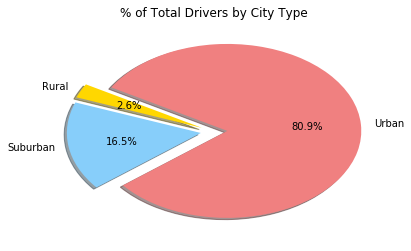

In [66]:
# % of Total Drivers by City Type 

Drivers_Group = location_data.groupby(['type'])
Total_Drivers = Drivers_Group['driver_count'].sum()



# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(Total_Drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("Percent of Total Drivers by City Type")

# Save Figure
plt.savefig("%TotalDrivers.png")

# Show Figure
plt.show()